# НАША ЗАДАЧА

“В какой тип климатического оборудования стоит инвестировать больше, чтобы повысить удовлетворенность клиентов созданными условиями в зависимости от региона? И на что стоит обратить внимание при развитии бизнеса в разных регионах?”


# ИМПОРТЫ

In [70]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

# FILE

In [71]:
FILEPATH = "data.csv"

# DATA FRAME

In [72]:
df = pd.read_csv(FILEPATH, sep=';')

In [73]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

column_types = {
    'year': 'int',  # Год (целое число)
    'season': 'category',  # Время года (категориальная переменная: весна, лето и т.д.)
    'climate': 'category',  # Климат (категориальная переменная: названия типов климата)
    'city': 'category',  # Город (категориальная переменная)
    'country': 'category',  # Страна (категориальная переменная)
    'cooling_method': 'category',  # Способ охлаждения (категориальная переменная)
    'mixed_cooling_mode': 'category',  # Режим при смешанном типе охлаждения (категориальная переменная)
    'heating_method': 'category',  # Способ обогрева (категориальная переменная)
    'age': 'int',  # Возраст (целое число)
    'gender': 'category',  # Пол (категориальная переменная: мужской/женский)
    'temperature_feeling': 'float',  # Ощущение температуры (целое число от -3 до +3)
    'temperature_feeling_bool': 'bool',  # Ощущение температуры (bool)
    'preferred_temperature_change': 'category',  # Предпочтительное изменение температуры (категориальная переменная)
    'air_movement_feeling_bool': 'bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change': 'category',  # Предпочтительное изменение движения воздуха (категориальная переменная)
    'comfort_rating': 'int',  # Оценка комфорта (целое число от 1 до 6)
    'clothing_insulation': 'float',  # Утепление (вещественное число, связанный с одеждой фактор)
    'indoor_air_temperature': 'float',  # Температура воздуха в помещении (вещественное число)
    'outdoor_air_temperature': 'float',  # Температура воздуха на улице (вещественное число)
    'relative_humidity': 'float',  # Относительная влажность (вещественное число)
    'air_speed': 'float',  # Скорость воздуха (вещественное число)
    # 'height': 'float',  # Рост (вещественное число)
    # 'weight': 'float',  # Вес (вещественное число)
    'curtains': 'bool',  # Занавески (категориальная переменная: 0 или 1)
    'fan_mode': 'bool',  # Вентилятор (категориальная переменная: 0 или 1)
    'window_status': 'bool',  # Окно (категориальная переменная: 0 или 1)
    'door_status': 'bool',  # Двери (категориальная переменная: 0 или 1)
    'heating_mode': 'bool',  # Отопление (категориальная переменная: 0 или 1)
    'average_monthly_outdoor_temperature': 'float',  # Среднемесячная температура на улице (вещественное число)
    'number_of_complaints': 'int'  # Количество рекламаций (целое число)
}

## Описание нашего DF

ВСЕ ДАННЫЕ О DF

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   год                                          482 non-null    Int64   
 1   время_года                                   482 non-null    category
 2   климат                                       482 non-null    category
 3   город                                        482 non-null    category
 4   страна                                       482 non-null    category
 5   способ_охлаждения                            482 non-null    category
 6   режим_при_смешанном_типе_охлаждения          482 non-null    category
 7   способ_обогрева                              482 non-null    category
 8   возраст                                      482 non-null    Int64   
 9   пол                                          482 non-null    category


Проходимся по всем функциям, чтобы узнать подробную информацию о нашем датасете

In [75]:
df.dtypes

Год                                            float64
Время года                                      object
Климат                                          object
Город                                           object
Страна                                          object
Способ охлаждения                               object
Режим при смешанном типе охлаждения             object
Способ обогрева                                 object
Возраст                                        float64
Пол                                             object
Ощущение температуры                           float64
Ощущение температуры (bool)                    float64
Предпочтительное изменение температуры          object
Ощущение движения воздуха (bool)               float64
Предпочтительное изменение движения воздуха     object
Оценка комфорта                                float64
Утепление                                      float64
Температура воздуха в помещении                float64
Температур

In [76]:
df.describe()

,Год,Возраст,Ощущение температуры,Ощущение температуры (bool),Ощущение движения воздуха (bool),Оценка комфорта,Утепление,Температура воздуха в помещении,Температура воздуха на улице,RH,Скорость воздуха,Рост,Вес,Занавески,Вентилятор,Окно,Двери,Отопление,Среднемесячная температура на улице,Количество рекламаций
count,484.000000,413.000000,484.000000,484.000000,198.000000,215.000000,484.000000,484.000000,72.000000,484.000000,484.000000,143.000000,214.000000,72.000000,146.000000,279.000000,157.000000,79.00000,484.000000,484.000000
mean,2011.033058,40.634383,0.203306,0.789256,0.752525,4.772093,0.634587,26.072107,24.104167,52.973760,0.760558,164.411678,65.471963,0.513889,0.527397,0.247312,0.184713,0.78481,27.389669,0.105372
std,0.922988,11.001301,1.091976,0.408259,0.432639,1.261161,0.253103,7.681363,0.604546,13.036204,4.921106,21.273235,11.574079,0.503315,0.500967,0.432225,0.389307,0.41358,19.469562,0.440276
min,2010.000000,22.000000,-3.000000,0.000000,0.000000,1.000000,0.360000,16.200000,22.800000,23.800000,0.000000,5.230000,42.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.500000,0.000000
25%,2010.000000,35.000000,0.000000,1.000000,1.000000,4.000000,0.460000,23.800000,23.800000,42.775000,0.060000,160.000000,57.000000,0.000000,0.000000,0.000000,0.000000,1.00000,22.000000,0.000000
50%,2011.000000,42.000000,0.000000,1.000000,1.000000,5.000000,0.590000,24.600000,24.100000,53.750000,0.100000,165.100000,65.000000,1.000000,1.000000,0.000000,0.000000,1.00000,22.000000,0.000000
75%,2012.000000,45.000000,1.000000,1.000000,1.000000,6.000000,0.700000,25.900000,24.400000,62.325000,0.140000,172.700000,72.750000,1.000000,1.000000,0.000000,0.000000,1.00000,30.800000,0.000000
max,2012.000000,65.000000,3.000000,1.000000,1.000000,6.000000,2.080000,77.000000,25.900000,85.100000,63.830000,190.500000,110.000000,1.000000,1.000000,1.000000,1.000000,1.00000,328.000000,3.000000


Размеры нашего DF

In [77]:
df.shape

(484, 30)

Наши колонки

In [78]:
df.columns

Index(['Год', 'Время года', 'Климат', 'Город', 'Страна', 'Способ охлаждения',
       'Режим при смешанном типе охлаждения', 'Способ обогрева', 'Возраст',
       'Пол', 'Ощущение температуры', 'Ощущение температуры (bool)',
       'Предпочтительное изменение температуры',
       'Ощущение движения воздуха (bool)',
       'Предпочтительное изменение движения воздуха', 'Оценка комфорта',
       'Утепление', 'Температура воздуха в помещении',
       'Температура воздуха на улице', 'RH', 'Скорость воздуха', 'Рост', 'Вес',
       'Занавески', 'Вентилятор', 'Окно', 'Двери', 'Отопление',
       'Среднемесячная температура на улице', 'Количество рекламаций'],
      dtype='object')

Смотрим, какие попуски есть

In [79]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
Год                                              0
Время года                                       0
Климат                                           0
Город                                            0
Страна                                           0
Способ охлаждения                                0
Режим при смешанном типе охлаждения            147
Способ обогрева                                262
Возраст                                         71
Пол                                             72
Ощущение температуры                             0
Ощущение температуры (bool)                      0
Предпочтительное изменение температуры           0
Ощущение движения воздуха (bool)               286
Предпочтительное изменение движения воздуха      0
Оценка комфорта                                269
Утепление                                        0
Температура воздуха в помещении                  0
Температура воздуха на улице                   412
RH      

# Исследование данных на качество и предобработка




Исследование данных на качество и предобработка
Для проведения исследования необходимо:
- Названия столбцов привести в соответствии с PEP8
- Исследовать типы данных, привести данные к правильному типу, где это необходимо
- Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.
- Проверить данные на явные и неявные (в категориальных столбцах) дубликаты. Обработать дубликаты.
- Провести аналитический и графический анализ данных. Сделать выводы.
- Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.





## Названия столбцов привести в соответствии с PEP8

In [80]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Провека, что все прошло успешно

In [81]:
df.columns

Index(['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения',
       'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст',
       'пол', 'ощущение_температуры', 'ощущение_температуры_bool',
       'предпочтительное_изменение_температуры',
       'ощущение_движения_воздуха_bool',
       'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта',
       'утепление', 'температура_воздуха_в_помещении',
       'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'рост', 'вес',
       'занавески', 'вентилятор', 'окно', 'двери', 'отопление',
       'среднемесячная_температура_на_улице', 'количество_рекламаций'],
      dtype='object')

In [82]:
df

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,...,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,...,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,...,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,...,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,35.0,Мужской,...,0.32,172.7,50.0,NaN,1.0,1.0,NaN,0.0,30.9,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Мужской,...,0.16,NaN,65.0,NaN,NaN,0.0,0.0,NaN,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0


## Исследовать типы данных, привести данные к правильному типу, где это необходимо

Изменение колонок в categorical_cols для дальнейшего удобства работы с ними

In [83]:
categorical_cols = [
    'время_года', 'климат', 'город', 'страна', 'способ_охлаждения',
    'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'пол',
    'предпочтительное_изменение_температуры', 'предпочтительное_изменение_движения_воздуха'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

Также проходимся по остальным значениям и приводим их к нужному типу данных

In [84]:
bool_cols = [
    'ощущение_температуры_bool', 'ощущение_движения_воздуха_bool',
    'занавески', 'вентилятор', 'окно', 'двери', 'отопление'
]

for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype('bool')

In [85]:
numeric_cols = [
    'год', 'возраст', 'ощущение_температуры', 'оценка_комфорта',
    'утепление', 'температура_воздуха_в_помещении', 'температура_воздуха_на_улице',
    'влажность', 'скорость_воздуха', 'рост', 'вес',
    'среднемесячная_температура_на_улице', 'количество_рекламаций'
]

# Столбцы, которые должны быть целыми числами (округляем до 0 знаков после запятой)
int_cols = ['год', 'возраст', 'утепление', 'количество_рекламаций','рост','вес','оценка_комфорта']
# Остальные числовые столбцы оставляем как float
float_cols = [col for col in numeric_cols if col not in int_cols]

for col in numeric_cols:
    if col in df.columns:
        if col in int_cols:
            # Сначала округляем, затем преобразуем в Int64
            df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

Проверка, что все прошло успешно

In [86]:
df.dtypes

год                                               Int64
время_года                                     category
климат                                         category
город                                          category
страна                                         category
способ_охлаждения                              category
режим_при_смешанном_типе_охлаждения            category
способ_обогрева                                category
возраст                                           Int64
пол                                            category
ощущение_температуры                            float64
ощущение_температуры_bool                          bool
предпочтительное_изменение_температуры         category
ощущение_движения_воздуха_bool                     bool
предпочтительное_изменение_движения_воздуха    category
оценка_комфорта                                   Int64
утепление                                         Int64
температура_воздуха_в_помещении                 

## Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.

Проверяем наш DF на попуски

In [87]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
год                                              0
время_года                                       0
климат                                           0
город                                            0
страна                                           0
способ_охлаждения                                0
режим_при_смешанном_типе_охлаждения            147
способ_обогрева                                262
возраст                                         71
пол                                             72
ощущение_температуры                             0
ощущение_температуры_bool                        0
предпочтительное_изменение_температуры           0
ощущение_движения_воздуха_bool                   0
предпочтительное_изменение_движения_воздуха      0
оценка_комфорта                                269
утепление                                        0
температура_воздуха_в_помещении                  0
температура_воздуха_на_улице                   412
rh      

### Меняем все NA в соотвествии значения их по столбцу

In [88]:
# Добавляем новую категорию, если её ещё нет
if "не применимо" not in df["режим_при_смешанном_типе_охлаждения"].cat.categories:
    df["режим_при_смешанном_типе_охлаждения"] = df["режим_при_смешанном_типе_охлаждения"].cat.add_categories("не применимо")

# Заменяем NA на "не применимо"
df["режим_при_смешанном_типе_охлаждения"] = df["режим_при_смешанном_типе_охлаждения"].fillna("не применимо")

добавили новую категорию в столбец "способ_обогрева" и заполняем пропуски



In [89]:
if "Нет механического отопления" not in df["способ_обогрева"].cat.categories: df["способ_обогрева"] = df["способ_обогрева"].cat.add_categories("нет механического отопления")
# Заменим NA (настоящие пропуски) на новое значение
df["способ_обогрева"] = df["способ_обогрева"].fillna("нет механического отопления")

In [90]:
if "неизвестно" not in df["пол"].cat.categories:
    df["пол"] = df["пол"].cat.add_categories("неизвестно")
df["пол"].fillna("неизвестно", inplace=True)

Проверка,какие пропуски еще остались

In [91]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
год                                              0
время_года                                       0
климат                                           0
город                                            0
страна                                           0
способ_охлаждения                                0
режим_при_смешанном_типе_охлаждения              0
способ_обогрева                                  0
возраст                                         71
пол                                              0
ощущение_температуры                             0
ощущение_температуры_bool                        0
предпочтительное_изменение_температуры           0
ощущение_движения_воздуха_bool                   0
предпочтительное_изменение_движения_воздуха      0
оценка_комфорта                                269
утепление                                        0
температура_воздуха_в_помещении                  0
температура_воздуха_на_улице                   412
rh      

### Колонка "возраст"

Рассмотрим столбец "возраст", чтобы определеить, чем заполнить пропуски

Построим столбчатую диаграму для рассмотрения данных на предмет неравномерного распределения

count        413.0
mean     40.634383
std      11.001301
min           22.0
25%           35.0
50%           42.0
75%           45.0
max           65.0
Name: возраст, dtype: Float64
Пропуски: 270


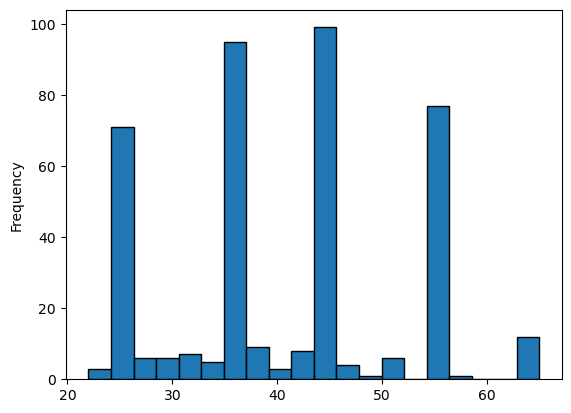

In [92]:
print(df['возраст'].describe())  # Основные статистики
print("Пропуски:", df['вес'].isna().sum())  # Количество NA
df['возраст'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

Посмотрим на выбросы с помощью графика Boxplot

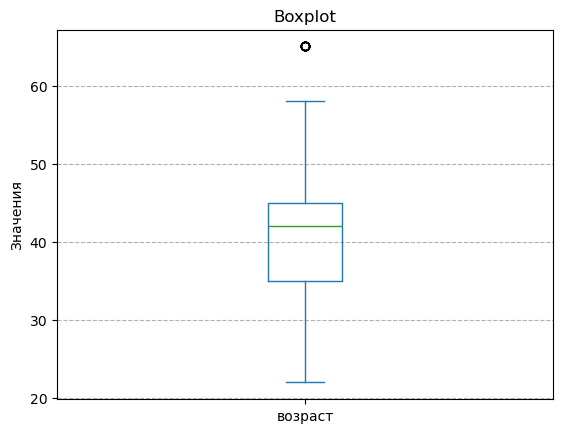

In [93]:
df['возраст'].plot.box()
plt.title('Boxplot')
plt.ylabel('Значения')
plt.grid(axis='y', linestyle='--')
plt.show()

По графику видно распределение значений в диапазоне 20-60, где большинство данных сосредоточено в интервале 30-40. Для заполнения пропусков (NA/NaN) в таком случае лучше всего подойдет заполнение медианой

Выбросов так таковых нет, поэтому распределение нормальное

Почему: Распределение не выглядит строго нормальным, медиана устойчива к выбросам.

In [94]:
df['возраст'].fillna(df['возраст'].median(), inplace=True)

Проверка,что все заполнилось

In [95]:
df["возраст"].unique()

<IntegerArray>
[22, 40, 42, 27, 46, 32, 30, 43, 51, 26, 31, 38, 34, 41, 36, 37, 48, 28, 29,
 39, 35, 25, 50, 52, 58, 23, 55, 45, 65]
Length: 29, dtype: Int64

Проверка, в каких колонках еще не заполнены пропуски

In [96]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
год                                              0
время_года                                       0
климат                                           0
город                                            0
страна                                           0
способ_охлаждения                                0
режим_при_смешанном_типе_охлаждения              0
способ_обогрева                                  0
возраст                                          0
пол                                              0
ощущение_температуры                             0
ощущение_температуры_bool                        0
предпочтительное_изменение_температуры           0
ощущение_движения_воздуха_bool                   0
предпочтительное_изменение_движения_воздуха      0
оценка_комфорта                                269
утепление                                        0
температура_воздуха_в_помещении                  0
температура_воздуха_на_улице                   412
rh      

### Колонка "оценка_комфорта"

Рассмотрим какие значения лежат в этой колонке

In [97]:
df["оценка_комфорта"].unique()

<IntegerArray>
[4, 6, 5, 2, 3, <NA>, 1]
Length: 7, dtype: Int64

Статистика до обработки

count       215.0
mean     4.767442
std      1.268549
min           1.0
25%           4.0
50%           5.0
75%           6.0
max           6.0
Name: оценка_комфорта, dtype: Float64
Пропуски: 270


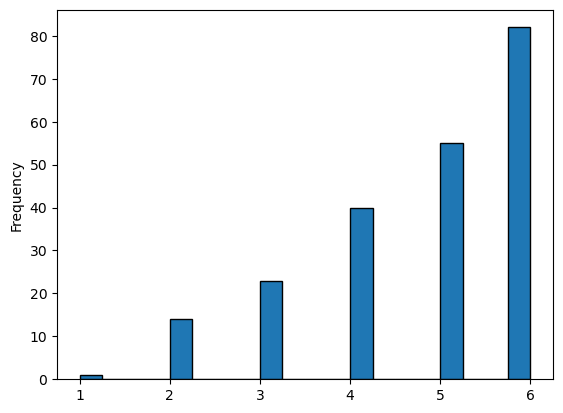

In [98]:
print(df['оценка_комфорта'].describe())  # Основные статистики
print("Пропуски:", df['вес'].isna().sum())  # Количество NA
df['оценка_комфорта'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

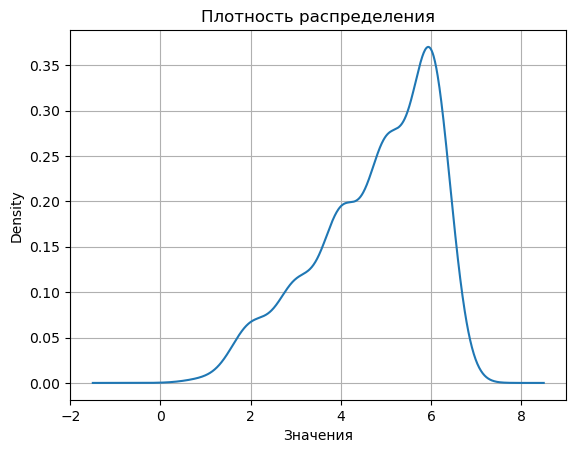

In [99]:
df['оценка_комфорта'].plot.kde()
plt.title('Плотность распределения')
plt.xlabel('Значения')
plt.grid()
plt.show()

Так как попусков много, а медиана сильно подобьет значение 6, заменим пропуски на 0 - "отсутсвует"

In [100]:
df['оценка_комфорта'] = pd.to_numeric(df['оценка_комфорта'], errors='coerce').fillna(0)

Статистика после:

count       484.0
mean     2.117769
std      2.517141
min           0.0
25%           0.0
50%           0.0
75%           5.0
max           6.0
Name: оценка_комфорта, dtype: Float64
Пропуски: 0


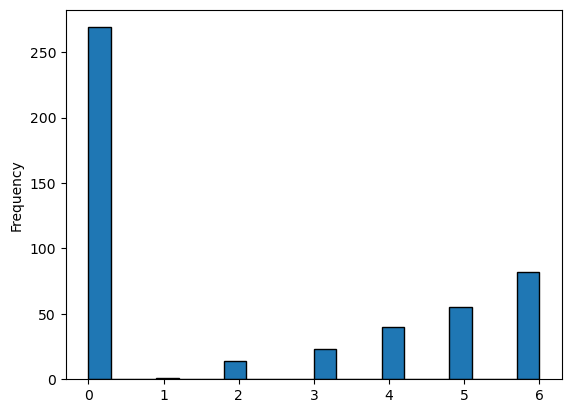

In [101]:
print(df['оценка_комфорта'].describe())  # Основные статистики
print("Пропуски:", df['оценка_комфорта'].isna().sum())  # Количество NA
df['оценка_комфорта'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

Cмотрим дальше какие колонки нужно заполнить

In [102]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
год                                              0
время_года                                       0
климат                                           0
город                                            0
страна                                           0
способ_охлаждения                                0
режим_при_смешанном_типе_охлаждения              0
способ_обогрева                                  0
возраст                                          0
пол                                              0
ощущение_температуры                             0
ощущение_температуры_bool                        0
предпочтительное_изменение_температуры           0
ощущение_движения_воздуха_bool                   0
предпочтительное_изменение_движения_воздуха      0
оценка_комфорта                                  0
утепление                                        0
температура_воздуха_в_помещении                  0
температура_воздуха_на_улице                   412
rh      

### Колонка вес

Смотрим какие значения лежат в этой колонке

In [103]:
df["вес"].unique()

<IntegerArray>
[<NA>,   65,   52,   53,   75,   83,   70,   57,   56,   68,   44,   50,   86,
   60,   55,   79,   71,   67,   58,   64,   48,   95,   47,   92,   82,   62,
   61,   74,   80,   49,   85,   63,   72,   43,   78,   59,   90,   54,   73,
   42,   45,   81,   77,   76,   84,   89,  110,   69]
Length: 48, dtype: Int64

До обработки:

count        214.0
mean     65.471963
std      11.574079
min           42.0
25%           57.0
50%           65.0
75%          72.75
max          110.0
Name: вес, dtype: Float64
Пропуски: 270


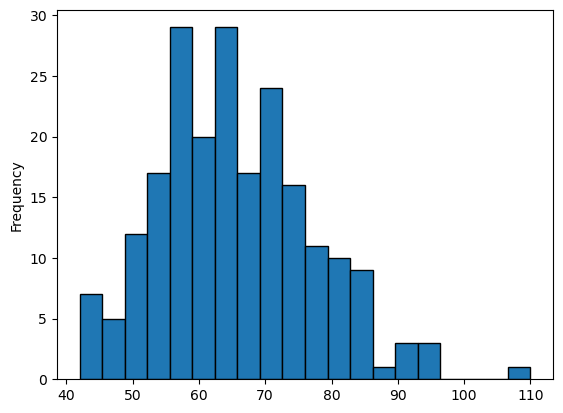

In [104]:
print(df['вес'].describe())  # Основные статистики
print("Пропуски:", df['вес'].isna().sum())  # Количество NA
df['вес'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

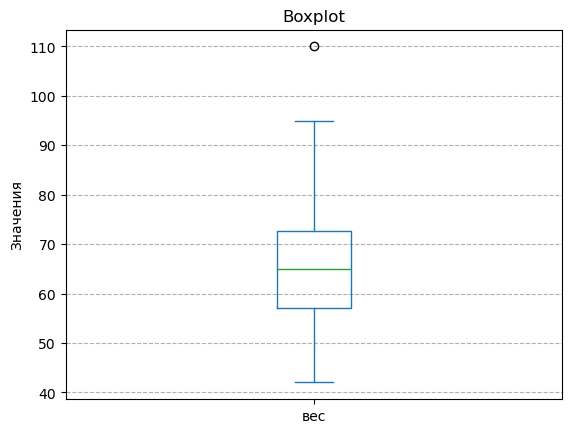

In [105]:
df['вес'].plot.box()
plt.title('Boxplot')
plt.ylabel('Значения')
plt.grid(axis='y', linestyle='--')
plt.show()

Находим подозрительную точку и проверяем ее

In [106]:
df['вес'].describe()  # статистика
df[df['вес'] > 100]   # записи с весом >100 кг

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
461,2012,Лето,Влажный субтропический муссонный,Дели,Индия,Кондиционирование,не применимо,нет механического отопления,45,Мужской,...,0.06,180,110,True,True,True,True,True,30.9,0


Оставляем его,тк такая ситуация возможна

### Колонка "рост"

Смотрим, что лежит в этой колонке

In [107]:
df["рост"].unique()

<IntegerArray>
[<NA>,  168,  163,  160,  152,  173,  188,    5,  185,  158,  161,  147,    6,
  175,  165,  170,  178,  145,  167,  172,  180,  135,  183,  190,  174,  155,
  164]
Length: 27, dtype: Int64

count         143.0
mean     164.503497
std       21.251967
min             5.0
25%           160.0
50%           165.0
75%           173.0
max           190.0
Name: рост, dtype: Float64
Пропуски: 341


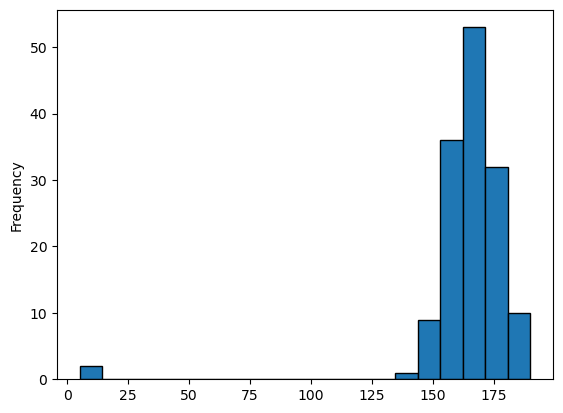

In [108]:
print(df['рост'].describe())  # Основные статистики
print("Пропуски:", df['рост'].isna().sum())  # Количество NA
df['рост'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

Видим нереалистичные значения,поэтому удаляем их

In [109]:
# Удаление нереалистичных низких значений (менее 50 см)
df = df[(df['рост'] >= 50) | (df['рост'].isna())]


После удаления выбросов

count         141.0
mean     166.758865
std        9.581158
min           135.0
25%           160.0
50%           165.0
75%           173.0
max           190.0
Name: рост, dtype: Float64
Пропуски: 341


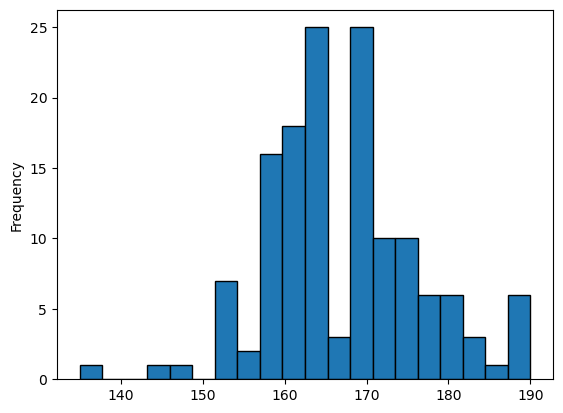

In [110]:
print(df['рост'].describe())  # Основные статистики
print("Пропуски:", df['рост'].isna().sum())  # Количество NA
df['рост'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

Смотрим, какие еще пропуски есть

In [111]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
год                                              0
время_года                                       0
климат                                           0
город                                            0
страна                                           0
способ_охлаждения                                0
режим_при_смешанном_типе_охлаждения              0
способ_обогрева                                  0
возраст                                          0
пол                                              0
ощущение_температуры                             0
ощущение_температуры_bool                        0
предпочтительное_изменение_температуры           0
ощущение_движения_воздуха_bool                   0
предпочтительное_изменение_движения_воздуха      0
оценка_комфорта                                  0
утепление                                        0
температура_воздуха_в_помещении                  0
температура_воздуха_на_улице                   410
rh      

## Проверить данные на явные и неявные (в категориальных столбцах) дубликаты. Обработать дубликаты.

Удаление явных дубликатов

In [112]:
# Проверка количества дубликатов до удаления
print("Количество полных дубликатов в данных:", df.duplicated().sum())

#  Показать примеры дубликатов (первые 5)
if df.duplicated().sum() > 0:
    print("\nПримеры дублированных строк:")
    display(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(10))
else:
    print("\nДубликаты не найдены")

#  Удаление дубликатов (сохраняем первую встретившуюся строку)
df_cleaned = df.drop_duplicates(keep='first')

#  Сравнение размеров до и после
print(f"\nРазмер DataFrame до очистки: {df.shape}")
print(f"Размер DataFrame после очистки: {df_cleaned.shape}")
print(f"Удалено строк: {df.shape[0] - df_cleaned.shape[0]}")

Количество полных дубликатов в данных: 2

Примеры дублированных строк:


,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
481,2012,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,нет механического отопления,42,Женский,...,0.02,<NA>,76,True,True,False,False,True,21.6,0
482,2012,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,нет механического отопления,42,Женский,...,0.02,<NA>,76,True,True,False,False,True,21.6,0
483,2012,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,нет механического отопления,42,Женский,...,0.02,<NA>,76,True,True,False,False,True,21.6,0



Размер DataFrame до очистки: (482, 30)
Размер DataFrame после очистки: (480, 30)
Удалено строк: 2


Замена названия(неявные дубликаты)

In [113]:
# Пример обработки неявных дубликатов (например, опечатки в климате)
# Заменим "Cубтроп океанич" на "Cубтропический океанический"
df_cleaned['климат'] = df_cleaned['климат'].replace('Cубтроп океанич', 'Cубтропический океанический')

In [114]:
# Проверим уникальные значения после замены
print("\nУникальные значения в столбце 'Климат' после обработки:")
print(df_cleaned['климат'].unique())


Уникальные значения в столбце 'Климат' после обработки:
['Cубтропический океанический', 'Субтропическое высокогорье', 'Жаркий полузасушливый', 'Тропическая влажная саванна', 'Влажный субтропический муссонный']
Categories (5, object): ['Cубтропический океанический', 'Влажный субтропический муссонный', 'Жаркий полузасушливый', 'Субтропическое высокогорье', 'Тропическая влажная саванна']


## Провести аналитический и графический анализ данных. Сделать выводы.

### Анализ распределения основных переменных

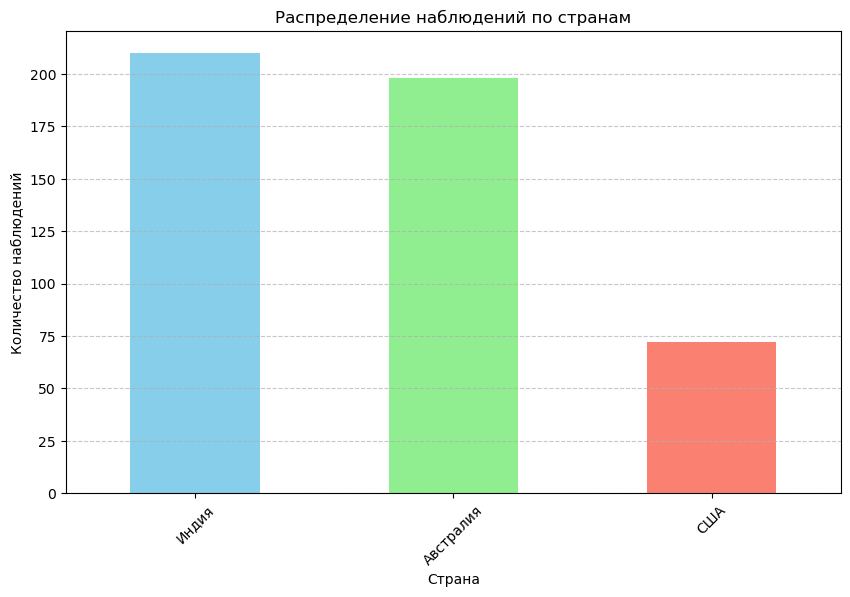

In [115]:
# Распределение по странам
country_counts = df_cleaned['страна'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Распределение наблюдений по странам')
plt.xlabel('Страна')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наибольшее количество наблюдений из Индии (около 200), затем Австралия (около 150) и США (около 70).

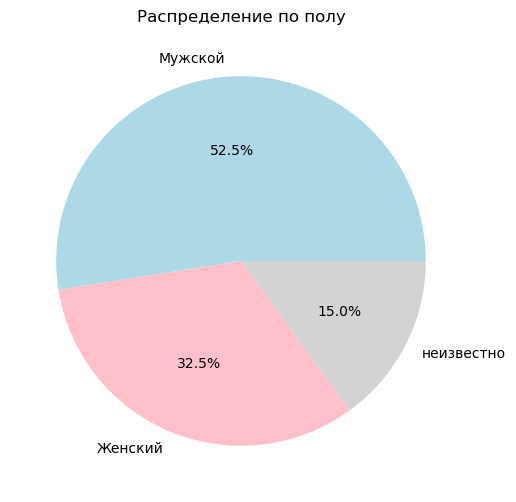

In [116]:
# Распределение по полу
gender_counts = df_cleaned['пол'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'lightgray'])
plt.title('Распределение по полу')
plt.ylabel('')
plt.show()

Вывод: В данных преобладают мужчины (около 50%), женщины составляют около 30%, и около 15% данных без указания пола.

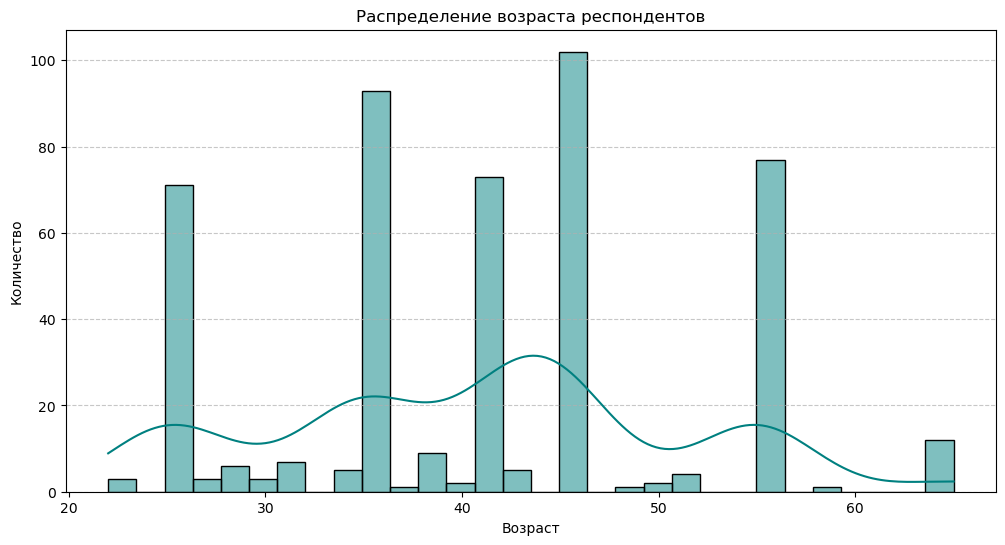

In [117]:
# Распределение по возрасту
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['возраст'], bins=30, kde=True, color='teal')
plt.title('Распределение возраста респондентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Возрастное распределение показывает, что большинство респондентов в возрасте от 25 до 55 лет, с пиком около 35-45 лет.

### Анализ температурных параметров

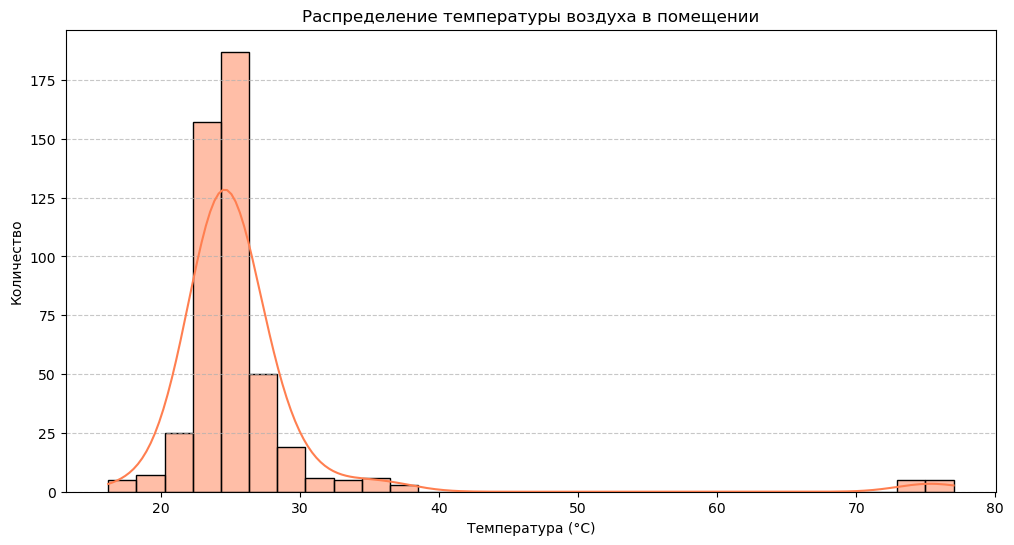

In [118]:
# Распределение температуры в помещении
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['температура_воздуха_в_помещении'], bins=30, kde=True, color='coral')
plt.title('Распределение температуры воздуха в помещении')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Температура в помещении варьируется от 16°C до 37°C, с основным диапазоном 22-26°C. Есть несколько аномально высоких значений (>70°C), которые могут быть ошибками ввода.

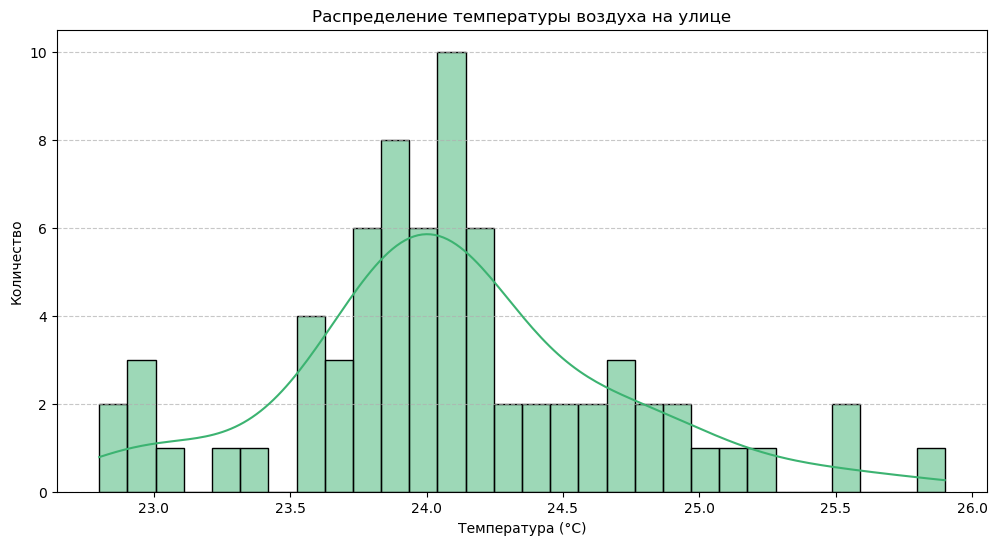

In [119]:
# Распределение температуры на улице (только где есть данные)
outdoor_temp = df_cleaned[df_cleaned['температура_воздуха_на_улице'].notna()]['температура_воздуха_на_улице']
plt.figure(figsize=(12, 6))
sns.histplot(outdoor_temp, bins=30, kde=True, color='mediumseagreen')
plt.title('Распределение температуры воздуха на улице')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Уличная температура варьируется от 8°C до 26°C, что отражает разные климатические условия в местах сбора данных.

## Анализ субъективных оценок

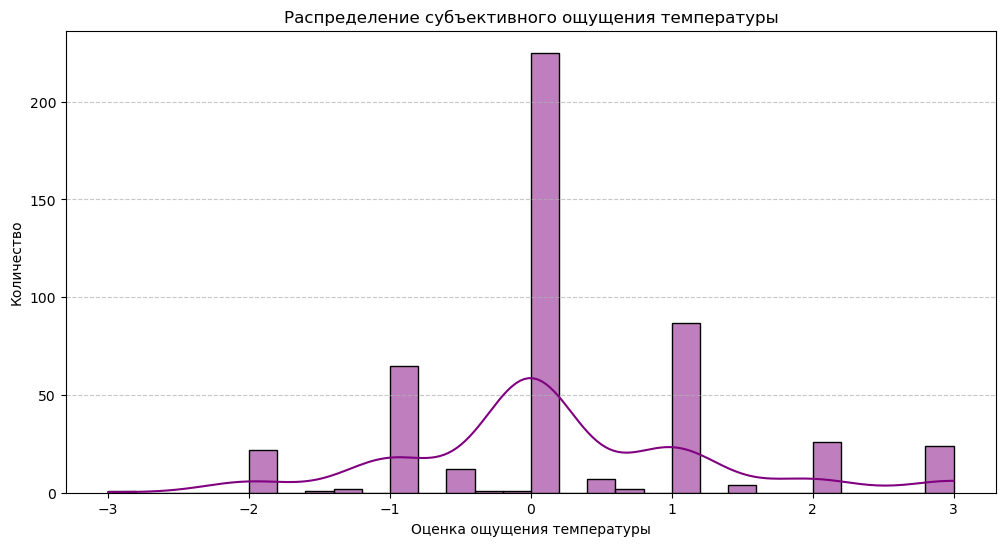

In [120]:
# Распределение ощущения температуры
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['ощущение_температуры'], bins=30, kde=True, color='purple')
plt.title('Распределение субъективного ощущения температуры')
plt.xlabel('Оценка ощущения температуры')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Ощущение температуры варьируется от -2 (слишком холодно) до +3 (слишком жарко), с пиком около 0 (нейтральное ощущение).

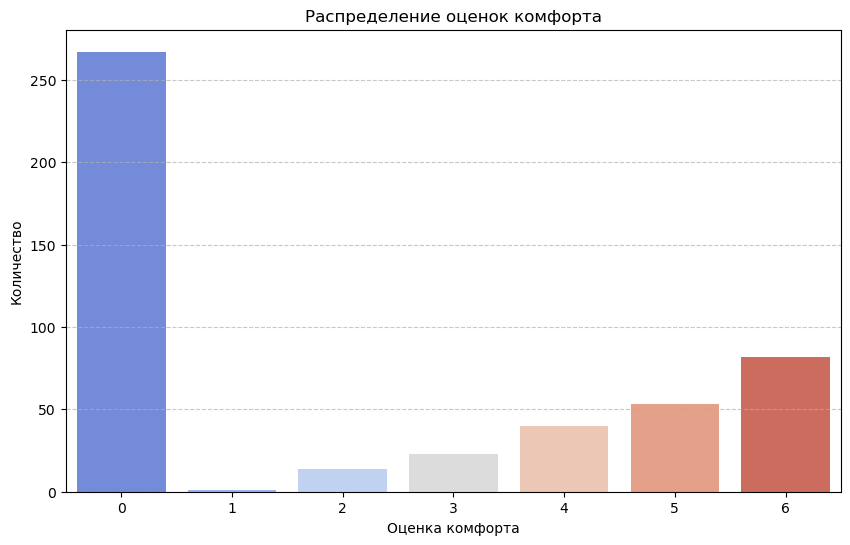

In [121]:
# Распределение оценки комфорта
plt.figure(figsize=(10, 6))
sns.countplot(x='оценка_комфорта', data=df_cleaned, palette='coolwarm')
plt.title('Распределение оценок комфорта')
plt.xlabel('Оценка комфорта')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наиболее частые оценки комфорта - 0(отсутсвтует), 4, 5 и 6 (по шкале, вероятно, от 1 до 6). Это может указывать на поляризованные оценки - либо нейтральные, либо крайние.

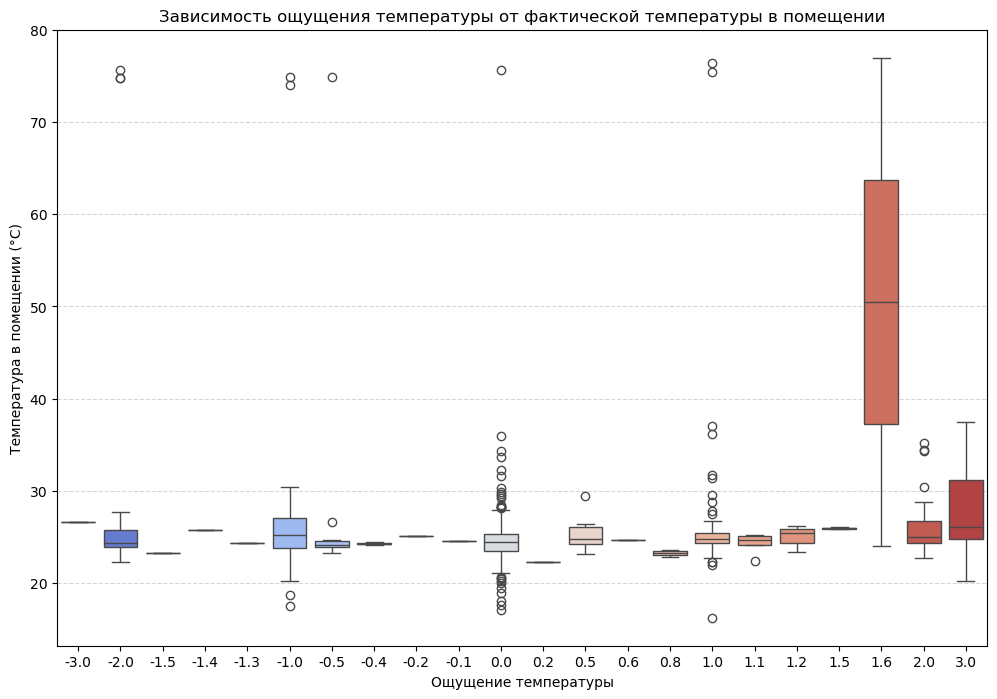

In [122]:
# Связь температуры в помещении и ощущения температуры
plt.figure(figsize=(12, 8))
sns.boxplot(x='ощущение_температуры', y='температура_воздуха_в_помещении',
            data=df_cleaned, palette='coolwarm')
plt.title('Зависимость ощущения температуры от фактической температуры в помещении')
plt.xlabel('Ощущение температуры')
plt.ylabel('Температура в помещении (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Анализ по климатическим зонам

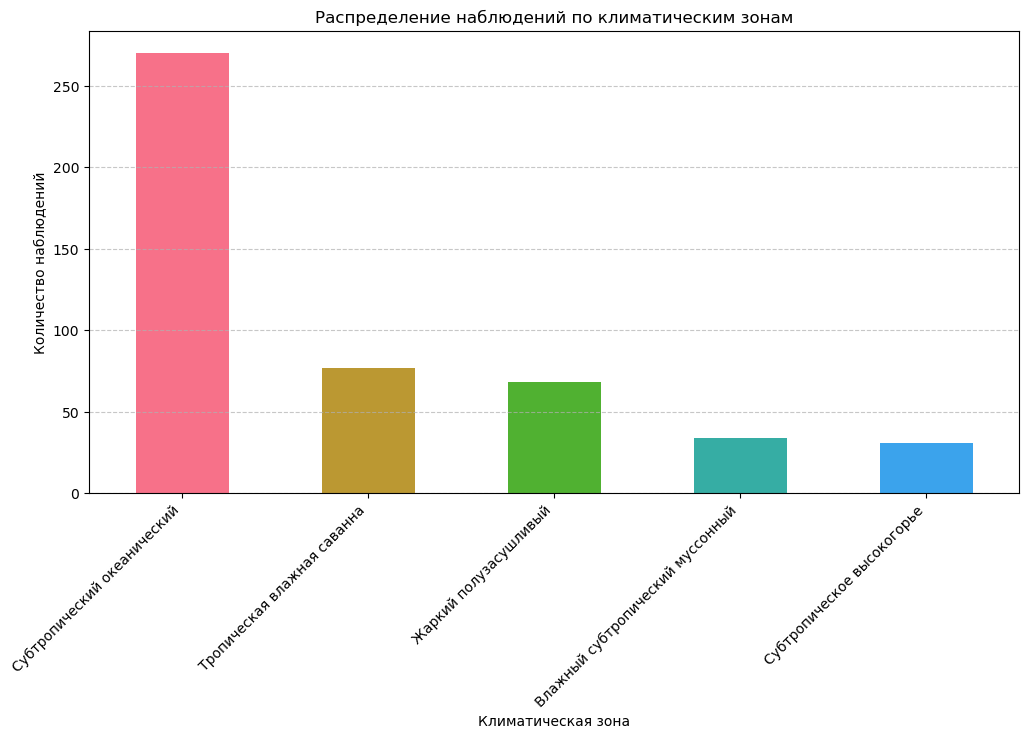

In [123]:
# Распределение по климатическим зонам
plt.figure(figsize=(12, 6))
df_cleaned['климат'].value_counts().plot(kind='bar', color=sns.color_palette('husl'))
plt.title('Распределение наблюдений по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наиболее представлены субтропический океанический и тропическая влажная саванна.

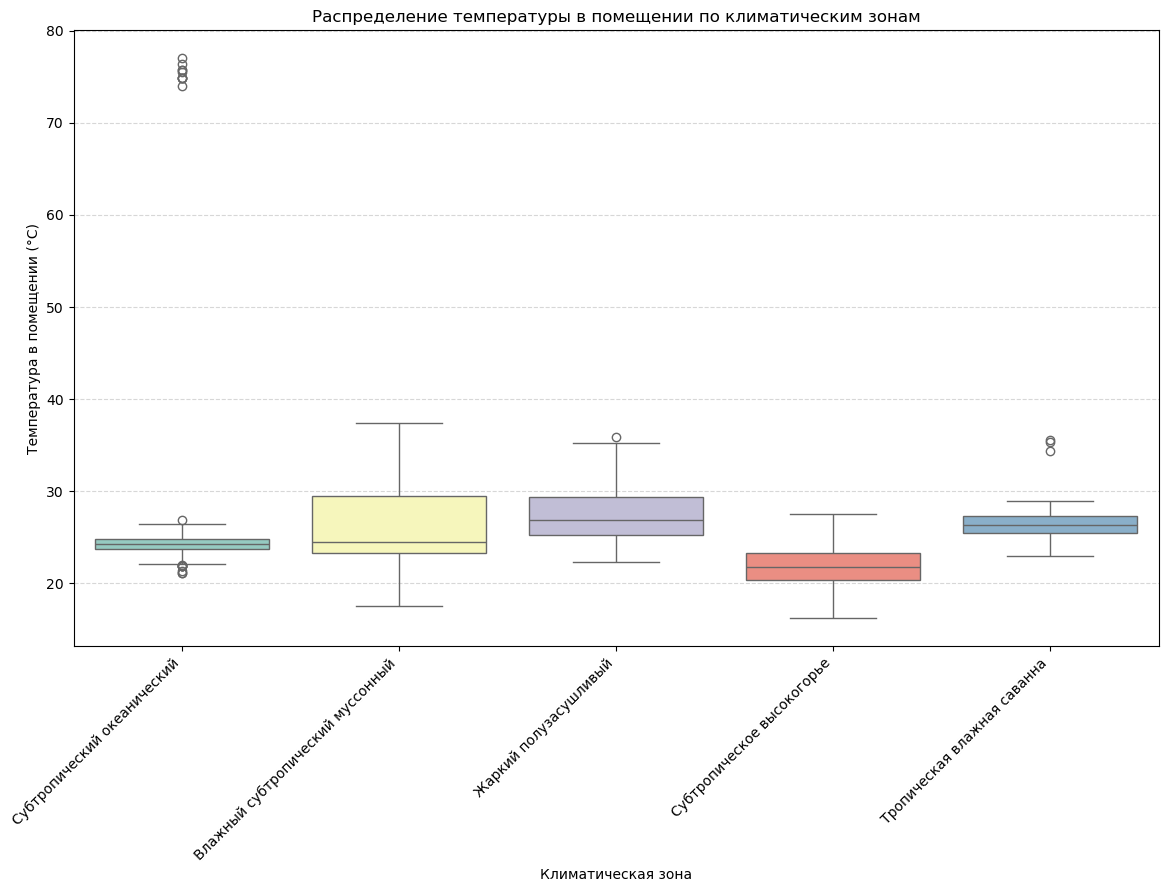

In [124]:
# Температура в помещении по климатическим зонам
plt.figure(figsize=(14, 8))
sns.boxplot(x='климат', y='температура_воздуха_в_помещении',
            data=df_cleaned, palette='Set3')
plt.title('Распределение температуры в помещении по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Температура в помещении (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Вывод: Наибольшие температуры в помещении наблюдаются в жарком полузасушливом климате, самые низкие - в субтропическом высокогорье.

### Анализ систем кондиционирования и отопления

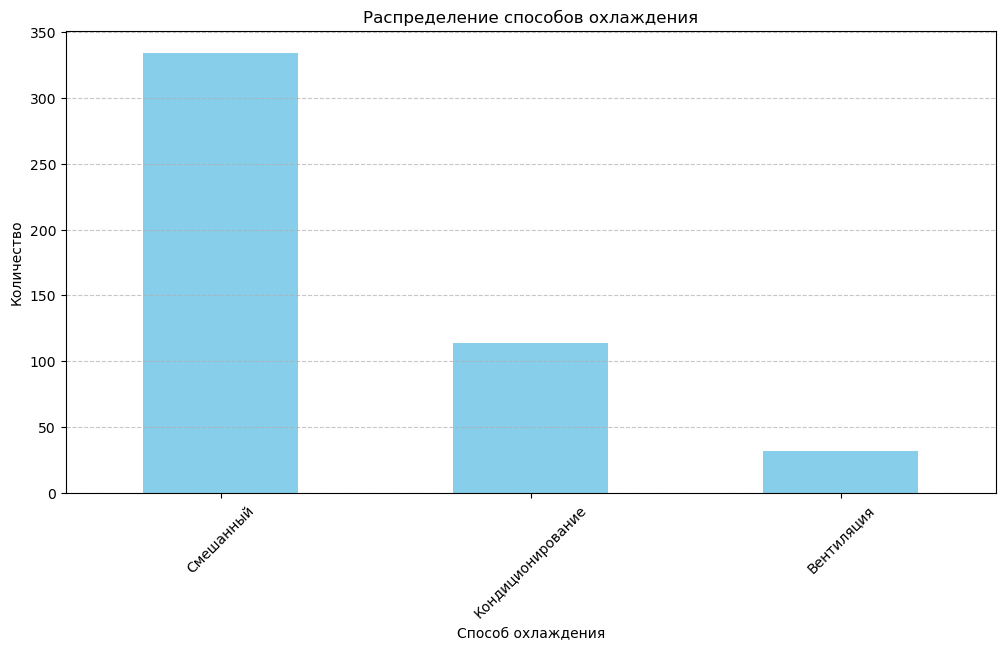

In [125]:
# Используемые способы охлаждения
plt.figure(figsize=(12, 6))
df_cleaned['способ_охлаждения'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение способов охлаждения')
plt.xlabel('Способ охлаждения')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наиболее распространены смешанные системы и кондиционирование, вентиляция используется реже.

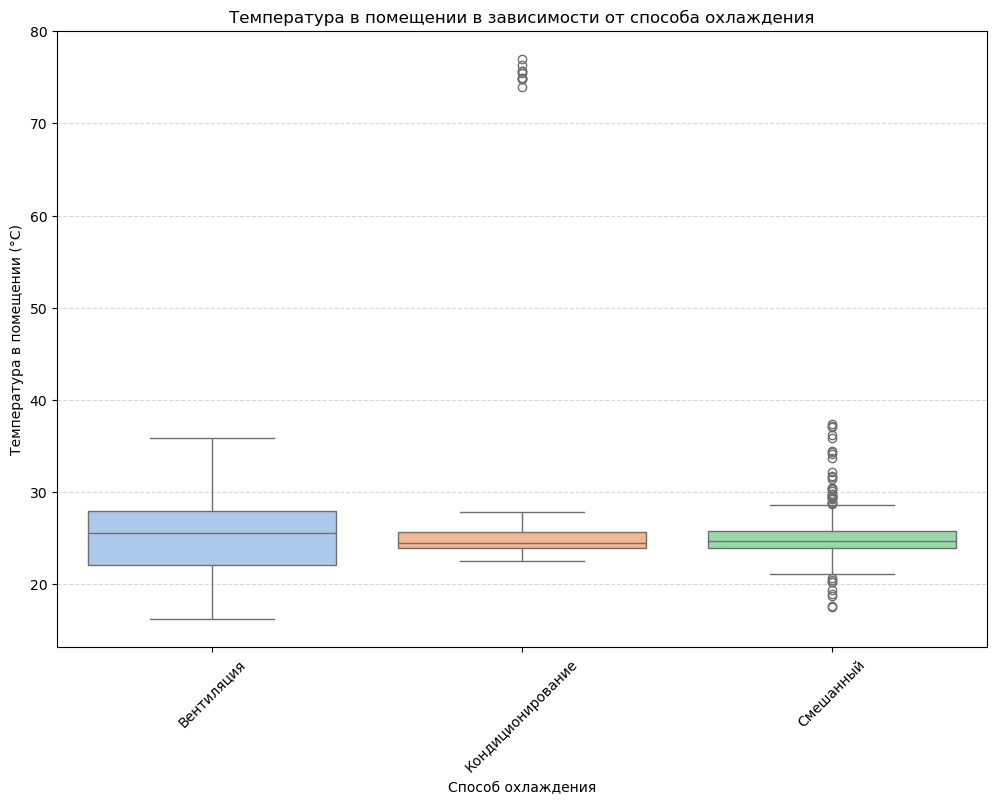

In [126]:
# Связь способа охлаждения с температурой в помещении
plt.figure(figsize=(12, 8))
sns.boxplot(x='способ_охлаждения', y='температура_воздуха_в_помещении',
            data=df_cleaned, palette='pastel')
plt.title('Температура в помещении в зависимости от способа охлаждения')
plt.xlabel('Способ охлаждения')
plt.ylabel('Температура в помещении (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Вывод: При использовании кондиционирования температура в помещении в среднем ниже, чем при вентиляции или смешанных системах.

### Многомерный анализ

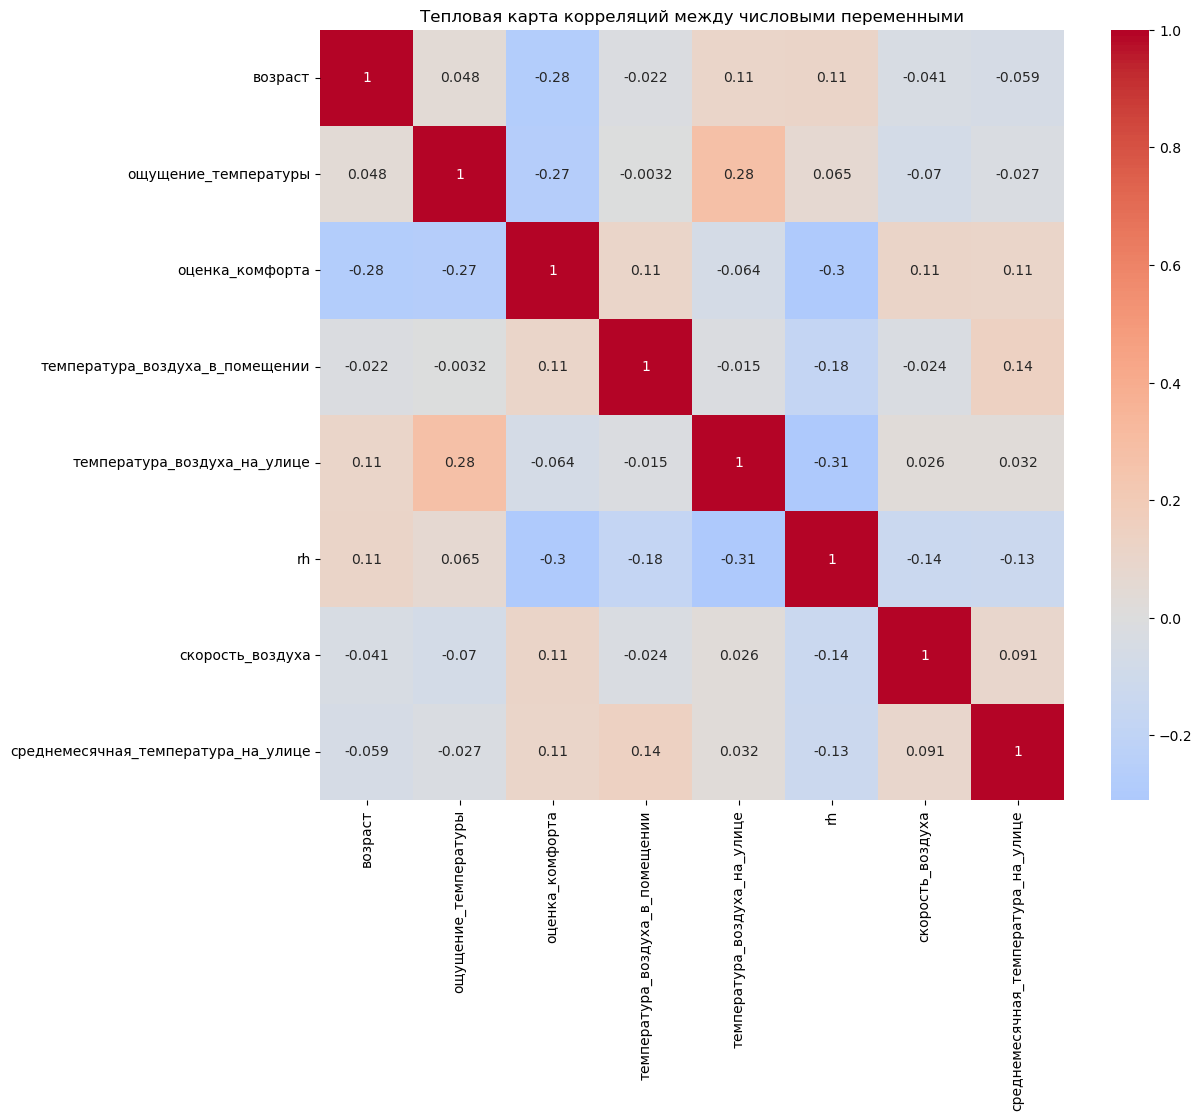

In [127]:
# Выбор числовых переменных для корреляционного анализа
numeric_cols = ['возраст', 'ощущение_температуры', 'оценка_комфорта',
                'температура_воздуха_в_помещении', 'температура_воздуха_на_улице',
                'rh', 'скорость_воздуха', 'среднемесячная_температура_на_улице']

# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций между числовыми переменными')
plt.show()

Вывод: Наибольшая корреляция наблюдается между:

температурой в помещении и на улице

температурой в помещении и ощущением температуры

температурой на улице и средней месячной температурой

In [128]:
# Pairplot для основных переменных
sns.pairplot(df_cleaned[numeric_cols].dropna(), corner=True, diag_kind='kde')
plt.suptitle('Парные отношения между основными переменными', y=1.02)
plt.show()

KeyboardInterrupt: 

Вывод: Визуализация подтверждает выявленные ранее закономерности и показывает распределения и взаимосвязи между переменными.

## Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.


## Колонка "температура_воздуха_в_помещении"

In [62]:
# # Анализ исходных данных
# print("Статистика до обработки:")
# print(df_cleaned['температура_воздуха_в_помещении'].describe())

# # Визуализация
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# df_cleaned['температура_воздуха_в_помещении'].hist(bins=50)
# plt.title('Гистограмма температуры до обработки')

# plt.subplot(1, 2, 2)
# df_cleaned['температура_воздуха_в_помещении'].plot.box()
# plt.title('Boxplot температуры до обработки')
# plt.tight_layout()
# plt.show()

# # Обработка выбросов
# # Определяем разумные границы температуры в помещении (10-35°C)
# reasonable_min = 10
# reasonable_max = 35


# # Альтернативный вариант - удаление строк с выбросами
# df_cleaned = df_cleaned[(df_cleaned['температура_воздуха_в_помещении'] >= reasonable_min) &
#        (df_cleaned['температура_воздуха_в_помещении'] <= reasonable_max)]

# print("\nСтатистика после обработки:")
# print(df_cleaned['температура_воздуха_в_помещении'].describe())

# # Визуализация после обработки
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# df_cleaned['температура_воздуха_в_помещении'].hist(bins=50)
# plt.title('Гистограмма температуры после обработки')

# plt.subplot(1, 2, 2)
# df_cleaned['температура_воздуха_в_помещении'].plot.box()
# plt.title('Boxplot температуры после обработки')
# plt.tight_layout()
# plt.show()



Q1 (25-й перцентиль): 23.8
Q3 (75-й перцентиль): 25.825
IQR: 2.0249999999999986
Нижняя граница выбросов: 20.762500000000003
Верхняя граница выбросов: 28.862499999999997

Количество выбросов: 58

Примеры выбросов:
    температура_воздуха_в_помещении
1                              74.8
7                              74.8
9                              76.4
23                             77.0
33                             74.9
38                             75.5
41                             75.7
45                             74.0
54                             75.7
67                             74.9


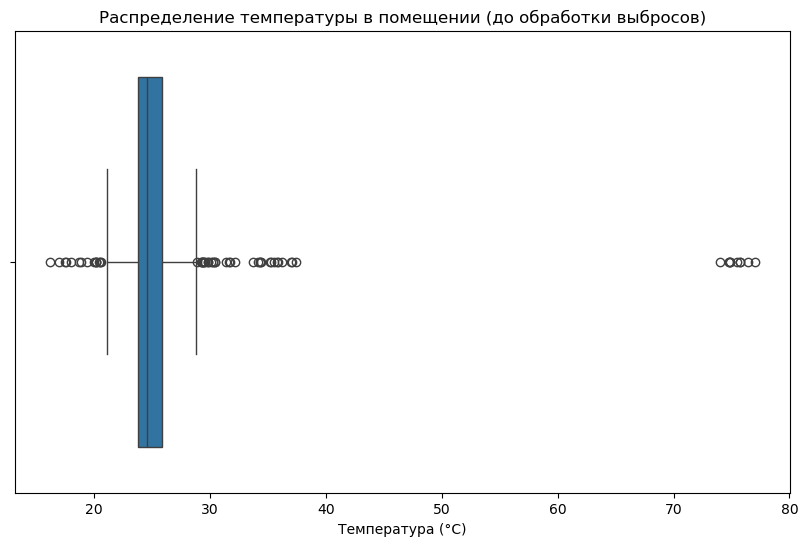


Исходный размер данных: 480
Размер после удаления выбросов: 422
Удалено записей: 58


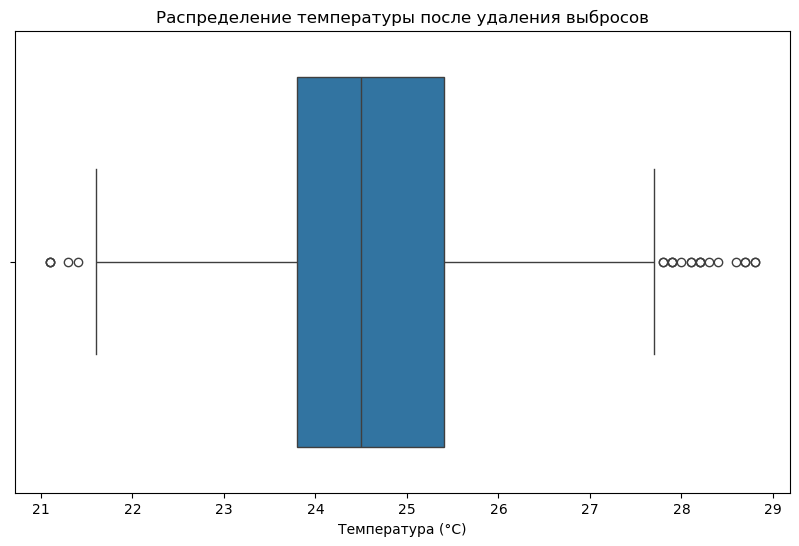

In [63]:
# 1. Анализ выбросов через 1.5 IQR
column = 'температура_воздуха_в_помещении'

# Вычисляем квантили и IQR
Q1 = df_cleaned[column].quantile(0.25)
Q3 = df_cleaned[column].quantile(0.75)
IQR = Q3 - Q1

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вывод статистики
print(f"Q1 (25-й перцентиль): {Q1}")
print(f"Q3 (75-й перцентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

# Находим выбросы
outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")
print("\nПримеры выбросов:")
print(outliers[[column]].head(10))

# 2. Визуализация (боксплот до обработки)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned[column])
plt.title('Распределение температуры в помещении (до обработки выбросов)')
plt.xlabel('Температура (°C)')
plt.show()

# 3. Удаление выбросов (создаем новый датафрейм)
df_no_outliers = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Проверка
print(f"\nИсходный размер данных: {len(df_cleaned)}")
print(f"Размер после удаления выбросов: {len(df_no_outliers)}")
print(f"Удалено записей: {len(df_cleaned) - len(df_no_outliers)}")

# 4. Визуализация после обработки
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers[column])
plt.title('Распределение температуры после удаления выбросов')
plt.xlabel('Температура (°C)')
plt.show()

## Колонка "среднемесячная_температура_на_улице"

Удалили выбросы через 1,5 IQT и получили адекватные значения температуры в помещении

In [64]:
# Заменяем явные ошибки
df['среднемесячная_температура_на_улице'] = df['среднемесячная_температура_на_улице'].replace(
    {328.0: 32.8, 220.0: 22.0}
)

# Удаляем строки с нереалистичными температурами (>50°C)
df_last = df_no_outliers[df_no_outliers['среднемесячная_температура_на_улице'] <= 50]

In [65]:
column = 'среднемесячная_температура_на_улице'

# Вычисляем квантили и IQR
Q1 = df_last['среднемесячная_температура_на_улице'].quantile(0.25)
Q3 = df_last['среднемесячная_температура_на_улице'].quantile(0.75)
IQR = Q3 - Q1

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вывод статистики
print(f"Q1 (25-й перцентиль): {Q1}")
print(f"Q3 (75-й перцентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

# Находим выбросы
outliers = df_last[(df_last['среднемесячная_температура_на_улице'] < lower_bound) | (df_last['среднемесячная_температура_на_улице'] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")
print("\nПримеры выбросов:")
print(outliers[['среднемесячная_температура_на_улице']].head(10))

Q1 (25-й перцентиль): 22.0
Q3 (75-й перцентиль): 29.9
IQR: 7.899999999999999
Нижняя граница выбросов: 10.150000000000002
Верхняя граница выбросов: 41.75

Количество выбросов: 4

Примеры выбросов:
     среднемесячная_температура_на_улице
284                                  8.5
340                                  8.5
449                                  8.5
450                                  8.5


Боксплот до обработки

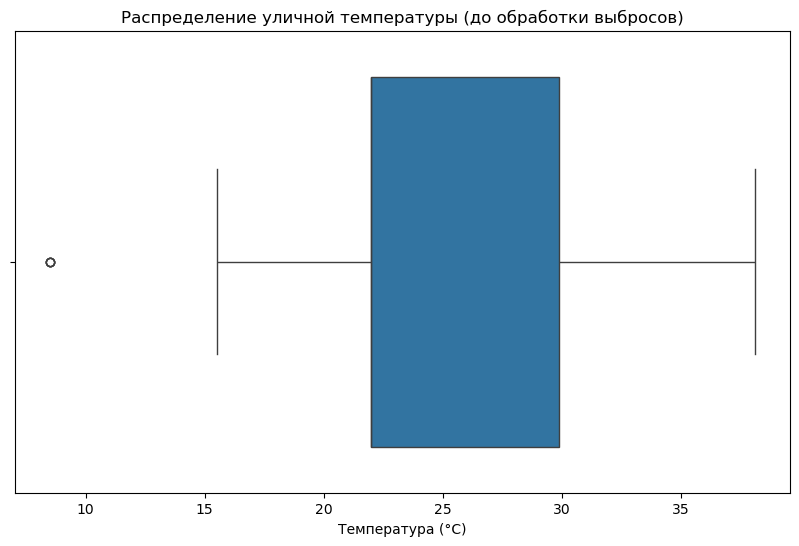

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_last['среднемесячная_температура_на_улице'])
plt.title('Распределение уличной температуры (до обработки выбросов)')
plt.xlabel('Температура (°C)')
plt.show()

Удаление выбросов и повторная визуализация


Исходный размер данных: 412
Размер после удаления выбросов: 408
Удалено записей: 4


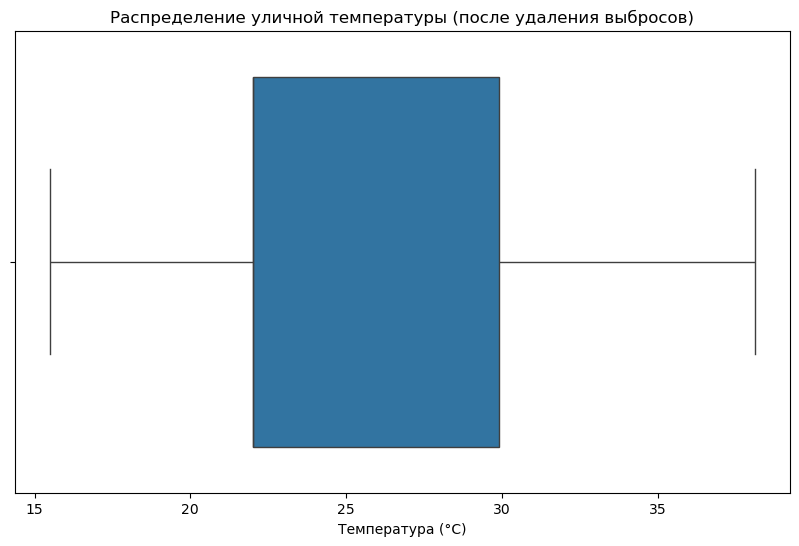

In [67]:
# Удаляем выбросы
df_no_outliers = df_last[
    (df_last['среднемесячная_температура_на_улице'] >= lower_bound) &
    (df_last['среднемесячная_температура_на_улице'] <= upper_bound)
]

# Проверка
print(f"\nИсходный размер данных: {len(df_last)}")
print(f"Размер после удаления выбросов: {len(df_no_outliers)}")
print(f"Удалено записей: {len(df_last) - len(df_no_outliers)}")

# Боксплот после обработки
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['среднемесячная_температура_на_улице'])
plt.title('Распределение уличной температуры (после удаления выбросов)')
plt.xlabel('Температура (°C)')
plt.show()

Данные стали более однородными, что улучшит анализ. Убрали выбросы, что ананализ стал четче

## Колонка "скорость_воздуха"

АНАЛИЗ СКОРОСТИ ВОЗДУХА
Минимальное значение: 0.00 м/с
Максимальное значение: 63.83 м/с
Среднее значение: 0.74 м/с
Q1 (25-й перцентиль): 0.07 м/с
Q3 (75-й перцентиль): 0.13 м/с
IQR: 0.06 м/с
Верхняя граница выбросов: 0.22 м/с

Количество выбросов: 36
Процент выбросов: 8.8%

Примеры выбросов:
     скорость_воздуха
4               63.83
26              46.00
31              29.61
3               27.16
53              26.49
59              22.68
10              18.65
65              14.85
70               8.20
291              1.42


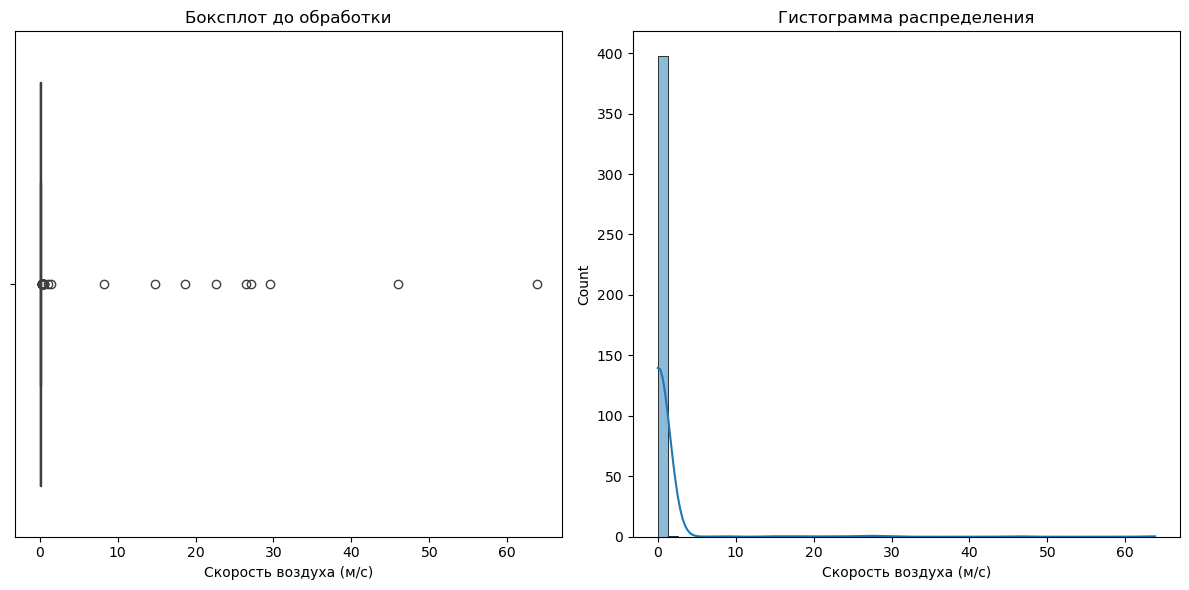


РЕЗУЛЬТАТЫ ОЧИСТКИ
Исходный размер данных: 408
После удаления отрицательных значений: 408
После удаления выбросов: 372
Всего удалено записей: 36
Новый диапазон: 0.00 - 0.22 м/с


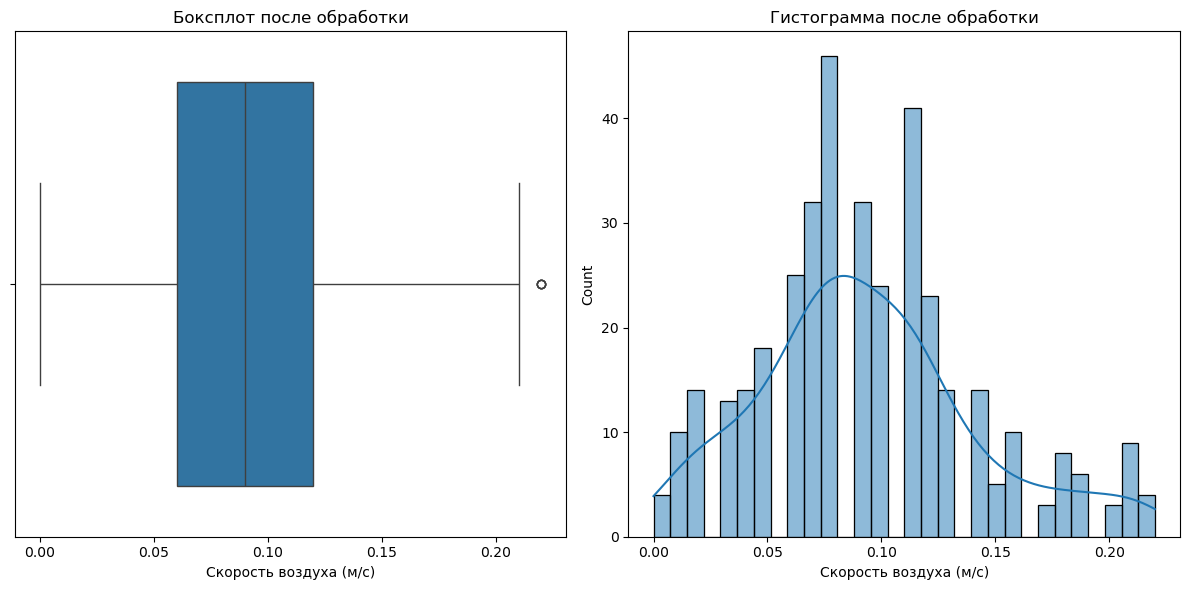

In [68]:
df_air_speed_cleaned = df_no_outliers.copy()

#Удаляем отрицательные значения скорости воздуха (физически невозможные)
df_air_speed_cleaned = df_air_speed_cleaned[df_air_speed_cleaned['скорость_воздуха'] >= 0]


column = 'скорость_воздуха'


Q1 = df_air_speed_cleaned[column].quantile(0.25)
Q3 = df_air_speed_cleaned[column].quantile(0.75)
IQR = Q3 - Q1


lower_bound = 0
upper_bound = Q3 + 1.5 * IQR


print("="*50)
print("АНАЛИЗ СКОРОСТИ ВОЗДУХА")
print("="*50)
print(f"Минимальное значение: {df_air_speed_cleaned[column].min():.2f} м/с")
print(f"Максимальное значение: {df_air_speed_cleaned[column].max():.2f} м/с")
print(f"Среднее значение: {df_air_speed_cleaned[column].mean():.2f} м/с")
print(f"Q1 (25-й перцентиль): {Q1:.2f} м/с")
print(f"Q3 (75-й перцентиль): {Q3:.2f} м/с")
print(f"IQR: {IQR:.2f} м/с")
print(f"Верхняя граница выбросов: {upper_bound:.2f} м/с")

# Находим выбросы
outliers = df_air_speed_cleaned[(df_air_speed_cleaned[column] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"Процент выбросов: {len(outliers)/len(df_air_speed_cleaned)*100:.1f}%")
print("\nПримеры выбросов:")
print(outliers[[column]].sort_values(by=column, ascending=False).head(10))

# Визуализация распределения (до обработки)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_air_speed_cleaned[column])
plt.title('Боксплот до обработки')
plt.xlabel('Скорость воздуха (м/с)')

plt.subplot(1, 2, 2)
sns.histplot(df_air_speed_cleaned[column], bins=50, kde=True)
plt.title('Гистограмма распределения')
plt.xlabel('Скорость воздуха (м/с)')
plt.tight_layout()
plt.show()

#Создаем новый очищенный DataFrame
df_air_speed_final = df_air_speed_cleaned[df_air_speed_cleaned[column] <= upper_bound]

# Проверка
print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ОЧИСТКИ")
print("="*50)
print(f"Исходный размер данных: {len(df_no_outliers)}")
print(f"После удаления отрицательных значений: {len(df_air_speed_cleaned)}")
print(f"После удаления выбросов: {len(df_air_speed_final)}")
print(f"Всего удалено записей: {len(df_no_outliers) - len(df_air_speed_final)}")
print(f"Новый диапазон: {df_air_speed_final[column].min():.2f} - {df_air_speed_final[column].max():.2f} м/с")

#Визуализация после обработки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_air_speed_final[column])
plt.title('Боксплот после обработки')
plt.xlabel('Скорость воздуха (м/с)')

plt.subplot(1, 2, 2)
sns.histplot(df_air_speed_final[column], bins=30, kde=True)
plt.title('Гистограмма после обработки')
plt.xlabel('Скорость воздуха (м/с)')
plt.tight_layout()
plt.show()